In [30]:
# 先做准备工作：需要先pip/conda install torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

In [31]:
# 模型：

D_in = 28 * 28
H1 = 50
H2 = 50
D_out = 10 

model = nn.Sequential(
    nn.Linear(D_in,H1),nn.ReLU(),
    nn.Linear(H1,H2),nn.ReLU(),
    nn.Linear(H2,D_out),
)


In [32]:
# 下载我们的数据：

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [33]:
print(train_dataset[0][0].shape)

torch.Size([1, 28, 28])


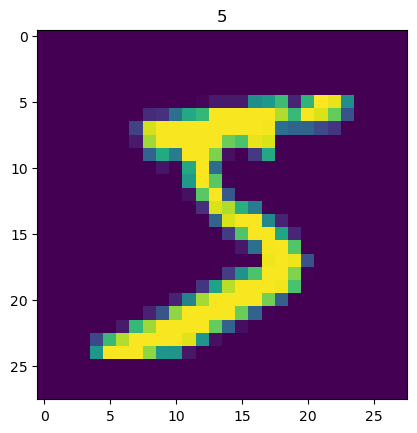

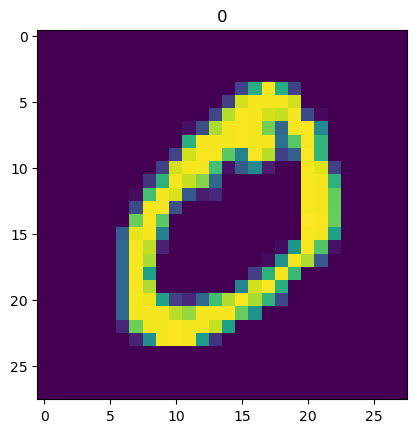

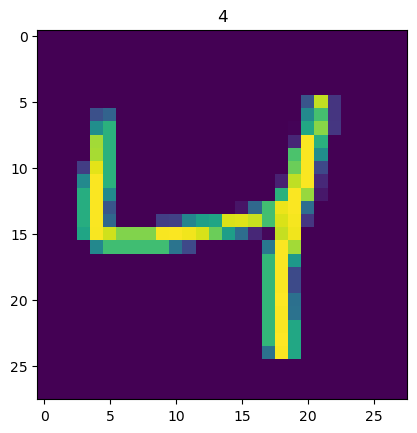

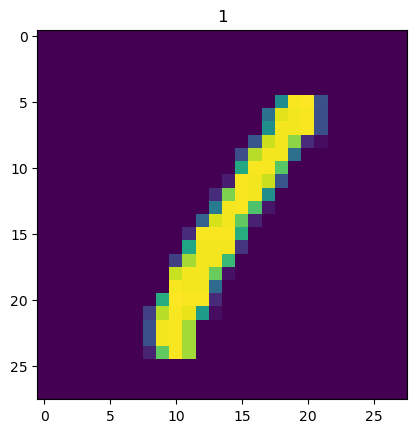

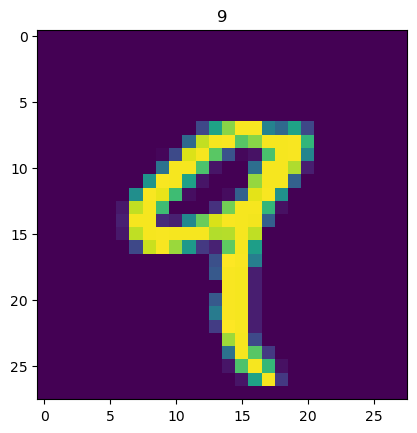

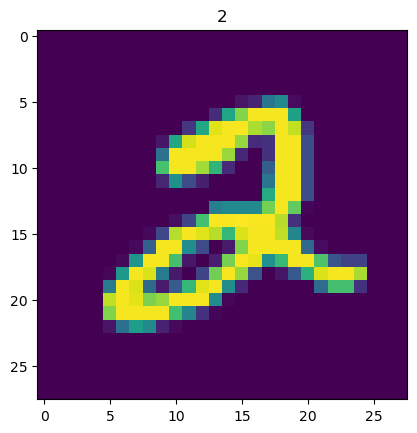

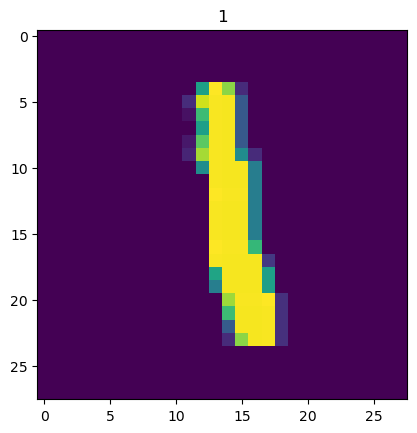

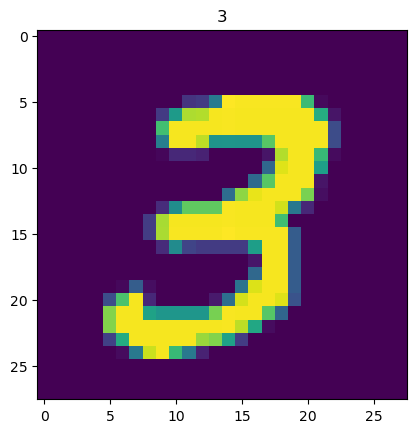

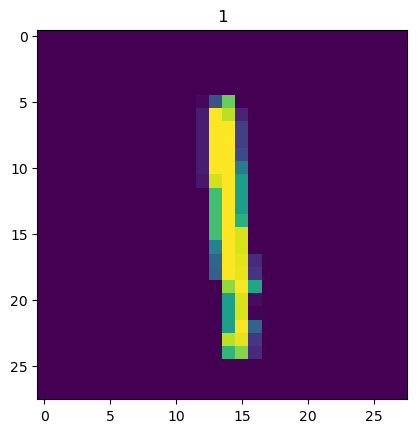

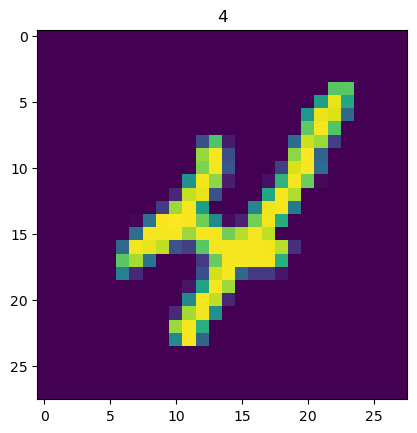

In [34]:
# 查看我们的数据：

for i in range(10):
    plt.imshow(train_dataset[i][0].reshape(28,28))
    plt.title(train_dataset[i][1])
    plt.show()


In [35]:
# 学习率、损失函数、优化器、循环次数

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
EPOCHS = 10

In [60]:
# 训练函数：

def train(model,criterion,train_loader,validation_loader,optimizer,epochs):
    # 建一个字典来存结果
    useful_stuff = {'train_loss':[],'validation_accuracy':[]} 

    # 训练过程
    for epoch in range(epochs):
        for x,y in train_loader:
            y = torch.tensor([y])
            yhat = model(x.view(-1,28*28))
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            useful_stuff['train_loss'].append(loss.item())

    # 检验过程
        right = 0
        for x,y in validation_dataset:
            yhat = model(x.view(-1,28 * 28))
            label = torch.max(yhat,1)[1]
            if label.item()==y:
                right+=1

        accuracy = 100 * (right / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff


In [61]:
relu_results = train(model,criterion,train_dataset,validation_dataset,optimizer,EPOCHS)

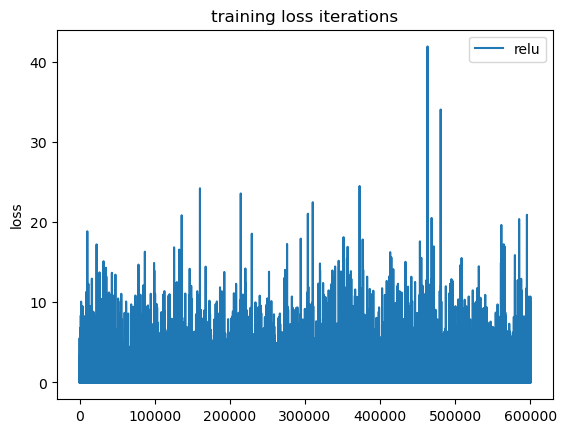

In [62]:
# 画出损失函数：

plt.plot(relu_results['train_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

In [63]:
print(relu_results['validation_accuracy'])

[96.67999999999999, 96.55, 96.49, 96.48, 96.52, 96.1, 96.63000000000001, 96.57, 96.67999999999999, 96.59]


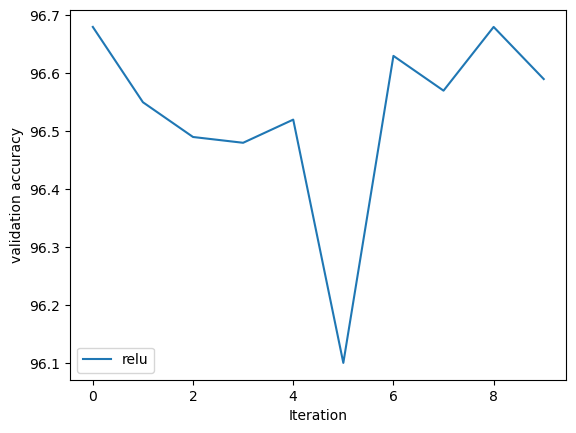

In [64]:
plt.plot(relu_results['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()